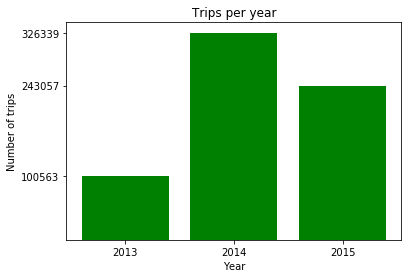

In [109]:
import xlrd
import pandas
import numpy
import matplotlib.pyplot as pt
from datetime import datetime 

df2014   = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201402_trip_data.csv',usecols=['Trip ID','Start Date','Start Station','End Date','End Station','Duration'])
df2014_2 = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201408_trip_data.csv',usecols=['Trip ID','Start Date','Start Station','End Date','End Station','Duration'])
df2015 = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201508_trip_data.csv',usecols=['Trip ID','Start Date','Start Station','End Date','End Station','Duration'])
dataframes = [df2014,df2014_2,df2015]
df = pandas.concat(dataframes)

df = df.drop_duplicates('Trip ID')
tripspryr = df[['Start Date','Trip ID']].copy()
tripspryr['Start Date'] =  pandas.to_datetime(tripspryr['Start Date'],format = '%m/%d/%Y %H:%M').dt.year
tripspryr = tripspryr.groupby('Start Date',as_index = False).count()
fig,ax = pt.subplots()
ax.set_title('Trips per year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of trips')
ax.set_xticks(tripspryr['Start Date'])
ax.set_xticklabels(tripspryr['Start Date'])
ax.set_yticks(tripspryr['Trip ID'])
ax.set_yticklabels(tripspryr['Trip ID'])
ax.bar(tripspryr['Start Date'], tripspryr['Trip ID'],0.8,color = 'Green')
pt.show()

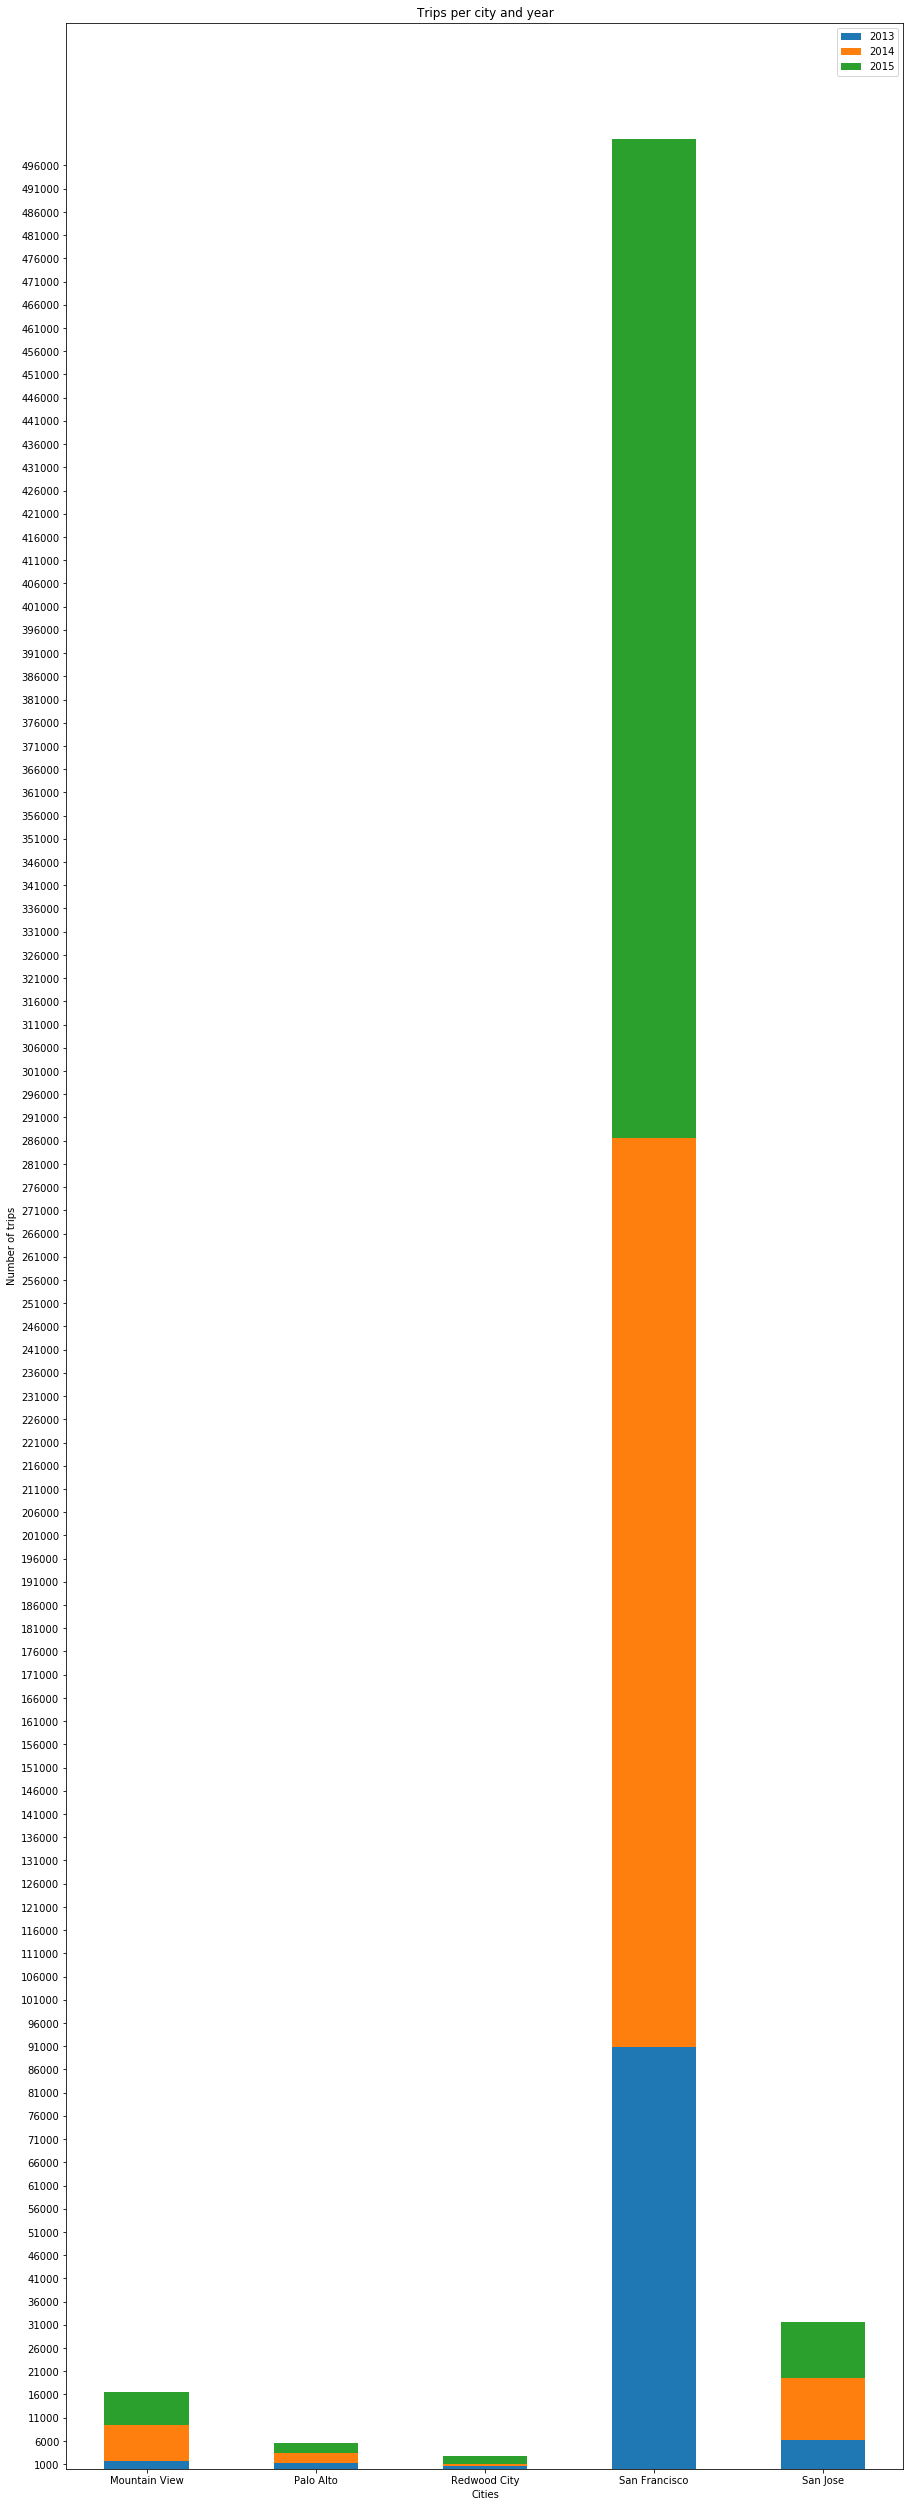

In [4]:
import xlrd
import pandas
import numpy
import matplotlib.pyplot as pt
from datetime import datetime 

df2014   = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201402_trip_data.csv',usecols=['Trip ID','Start Date','Start Station','End Date','End Station','Duration'])
df2014_2 = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201408_trip_data.csv',usecols=['Trip ID','Start Date','Start Station','End Date','End Station','Duration'])
df2015 = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201508_trip_data.csv',usecols=['Trip ID','Start Date','Start Station','End Date','End Station','Duration'])
dataframes = [df2014,df2014_2,df2015]
df = pandas.concat(dataframes)
df = df.drop_duplicates('Trip ID')
landmarks = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201508_station_data.csv',usecols = ['name','landmark'])
tripspryr = df[['Start Date','Trip ID','Start Station']].copy()
tripspryr['Start Date'] =  pandas.to_datetime(tripspryr['Start Date'],format = '%m/%d/%Y %H:%M').dt.year
landmarks = landmarks.rename(columns={'name':'Start Station'})
tripspryr = pandas.merge(tripspryr, landmarks, how='inner', left_on=['Start Station'], right_on=['Start Station'])
tripspryr = tripspryr.groupby(['landmark','Start Date'],as_index = False).count()
trips13 = tripspryr.loc[(tripspryr['Start Date']==2013)]
trips14 = tripspryr.loc[(tripspryr['Start Date']==2014)]
trips15 = tripspryr.loc[(tripspryr['Start Date']==2015)]
fig,ax = pt.subplots()
fig_size = pt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 45
pt.rcParams["figure.figsize"] = fig_size
ax.set_title('Trips per city and year')
ax.set_xlabel('Cities')
ax.set_ylabel('Number of trips')
ax.set_xticklabels(trips13['landmark'])
ax.set_xticks(numpy.arange(len(trips13['landmark'])))
ax.set_yticks(numpy.arange(1000,500000,5000))
bg1 = ax.bar(numpy.arange(len(trips13['landmark'])),trips13['Trip ID'],0.5)
bg2 = ax.bar(numpy.arange(len(trips13['landmark'])),trips14['Trip ID'],0.5,bottom = trips13['Trip ID'])
bg3 = ax.bar(numpy.arange(len(trips13['landmark'])),trips15['Trip ID'],0.5,bottom = trips14['Trip ID'])
ax.legend((bg1[0],bg2[0],bg3[0]),('2013','2014','2015'))
pt.show()


In [152]:
import xlrd
import pandas
import numpy
import matplotlib.pyplot as pt
from datetime import datetime 

df2014   = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201402_trip_data.csv',usecols=['Trip ID','Start Date','Start Station','End Date','End Station','Duration'])
df2014_2 = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201408_trip_data.csv',usecols=['Trip ID','Start Date','Start Station','End Date','End Station','Duration'])
df2015 = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201508_trip_data.csv',usecols=['Trip ID','Start Date','Start Station','End Date','End Station','Duration'])
dataframes = [df2014,df2014_2,df2015]
df = pandas.concat(dataframes)
df = df.drop_duplicates('Trip ID')
landmarks = pandas.read_csv('C:\\Users\\hiranya kireety\\Downloads\\bikeshareanalysis\\201508_station_data.csv',usecols = ['name','landmark'])
tripspryr = df[['Start Date','Trip ID','Start Station']].copy()
tripspryr['Start Date'] =  pandas.to_datetime(tripspryr['Start Date'],format = '%m/%d/%Y %H:%M').dt.year
landmarks = landmarks.rename(columns={'name':'Start Station'})
tripspryr = pandas.merge(tripspryr, landmarks, how='inner', left_on=['Start Station'], right_on=['Start Station'])
tripspryr = tripspryr.groupby(['landmark','Start Date'],as_index = False).count()
trips13 = tripspryr.loc[(tripspryr['Start Date']==2013)]
trips14 = tripspryr.loc[(tripspryr['Start Date']==2014)]
trips15 = tripspryr.loc[(tripspryr['Start Date']==2015)]
print(trips13)
print(trips14)
print(trips15)

         landmark  Start Date  Trip ID  Start Station
0   Mountain View        2013     1642           1642
3       Palo Alto        2013     1268           1268
6    Redwood City        2013      614            614
9   San Francisco        2013    90770          90770
12       San Jose        2013     6240           6240
         landmark  Start Date  Trip ID  Start Station
1   Mountain View        2014     9520           9520
4       Palo Alto        2014     3345           3345
7    Redwood City        2014     1117           1117
10  San Francisco        2014   286475         286475
13       San Jose        2014    19543          19543
         landmark  Start Date  Trip ID  Start Station
2   Mountain View        2015     7005           7005
5       Palo Alto        2015     2160           2160
8    Redwood City        2015     1635           1635
11  San Francisco        2015   215211         215211
14       San Jose        2015    12072          12072
